In [1]:
import pandas as pd
import numpy as np

In [2]:
#mostar todas as colunas disponiveis

pd.set_option('display.max_columns', None)

In [3]:
path = '../data/raw/telco_churn.csv'

In [4]:
df = pd.read_csv(path)

In [6]:
#visualizando as 5 primeiras linhas
display(df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#Convertendo TotalCharges para Números
#usando coerce para transformar '' em NaN automaticamente

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [11]:
#Verificando nulos após a conversão
nulos = df['TotalCharges'].isnull().sum()
print(f'A Quantidade de valores nulos em TotalCharges = {nulos}')

A Quantidade de valores nulos em TotalCharges = 11


In [12]:
# Investigar os nulos
#Selecionando colunas para entender o contexto

nulos_contexto = df[df['TotalCharges'].isnull()][['tenure', 'MonthlyCharges', 'TotalCharges']]
display(nulos_contexto)

,tenure,MonthlyCharges,TotalCharges
488,0,52.55,NaN
753,0,20.25,NaN
936,0,80.85,NaN
1082,0,25.75,NaN
1340,0,56.05,NaN
3331,0,19.85,NaN
3826,0,25.35,NaN
4380,0,20.00,NaN
5218,0,19.70,NaN
6670,0,73.35,NaN


In [15]:
# A coluna tenure = 0 mostra que são novos clientes, o que faz sentido o TotalCharges ser 0
#Logo vou preencher com 0 ao inves de drop

df['TotalCharges'] = df['TotalCharges'].fillna(0)

print(f"\nValores nulos após tratamento = {df['TotalCharges'].isnull().sum()}")


Valores nulos após tratamento = 0


### Internet de Fibra Óptica é mais cara e rápida, mas pode dar problemas técnicos. Será que clientes que contratam a internet mais cara (Fiber optic) mas NÃO contratam suporte técnico (TechSupport: No) cancelam mais por frustração?

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

#Filtrando quem possui fibra optica

df_fibra = df[df['InternetService'] == 'Fiber optic']

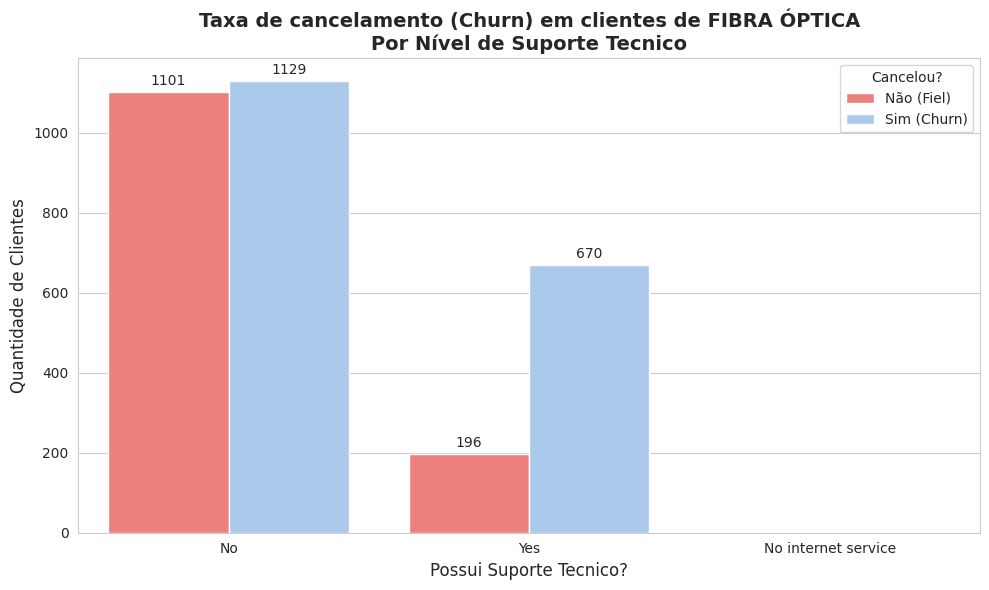

In [21]:
#Gráfico
plt.figure(figsize=(10,6))

ax = sns.countplot(
    data=df_fibra,
    x='TechSupport',
    hue='Churn',
    palette={'No': '#a1c9f4', 'Yes': '#ff6f69'},
    order=['No', 'Yes', 'No internet service']
)

plt.title('Taxa de cancelamento (Churn) em clientes de FIBRA ÓPTICA\nPor Nível de Suporte Tecnico', fontsize=14, fontweight='bold')
plt.xlabel('Possui Suporte Tecnico?', fontsize=12)
plt.ylabel('Quantidade de Clientes', fontsize=12)
plt.legend(title='Cancelou?',labels=['Não (Fiel)', 'Sim (Churn)'])

#adicionando numero em cima das barras para facilitar a leitura
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() /2. ,p.get_height()),
                    ha = 'center', va='center',
                    xytext=(0,8),
                    textcoords='offset points'
                    )
        
plt.tight_layout()
plt.show()

##### A análise confirma a hipótese: Clientes com internet de alta performance (Fibra) mas sem suporte técnico apresentam uma taxa de churn alarmante. Isso sugere que, ao encontrar problemas técnicos e não ter a quem recorrer, a frustração leva ao cancelamento imediato. Ação Recomendada: Oferecer suporte técnico gratuito ou descontado nos primeiros 3 meses para assinantes de Fibra.